In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

In [95]:
df = pd.read_csv(r'../resources/data/core/admissions.csv')
print(len(df))
patients = pd.read_csv(r'../resources/data/core/patients.csv')
print(len(patients))

1480
382278


In [4]:
print(df['deathtime'].isnull().sum() / len(df))
print(set(df['insurance'].to_list()))

0.5540540540540541
{'Other', 'Medicaid', 'Medicare'}


<AxesSubplot: xlabel='admittime', ylabel='time'>

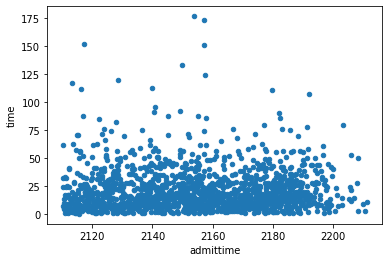

In [57]:
def strToDatetime(date):
    return datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
def getDifferenceDays(x, y):
    return (y - x).days

filtered_df= df[df['dischtime'].notna()].copy()
filtered_df["dischtime"] = filtered_df["dischtime"].map(strToDatetime)
filtered_df["admittime"] = filtered_df["admittime"].map(strToDatetime)
filtered_df["time"] = filtered_df.apply(lambda x: getDifferenceDays(x.admittime, x.dischtime), axis=1)
filtered_df = filtered_df[filtered_df['time'] < 1000].copy()
filtered_df.plot.scatter(x="admittime", y="time")

<AxesSubplot: xlabel='time', ylabel='insurance'>

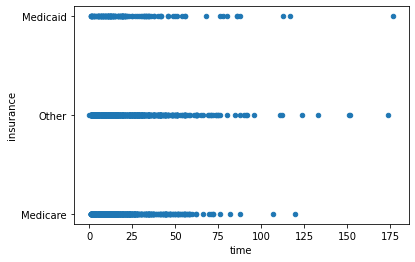

In [49]:
filtered_df.plot.scatter(y="insurance", x="time")

<AxesSubplot: xlabel='time', ylabel='ethnicity'>

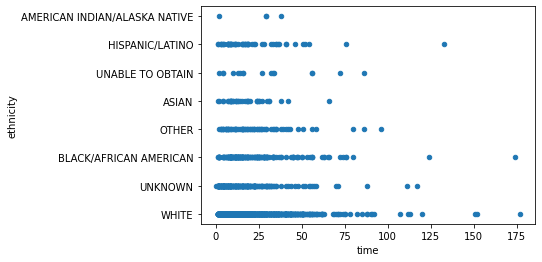

In [28]:
filtered_df.plot.scatter(y="ethnicity", x="time")

<AxesSubplot: xlabel='time', ylabel='ethnicity'>

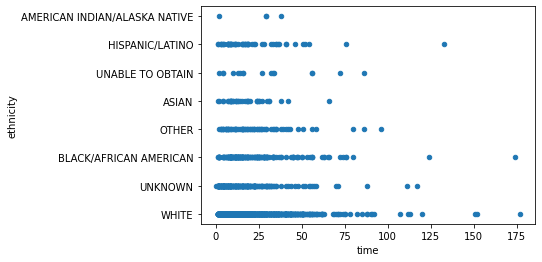

In [65]:
filtered_df.plot.scatter(y="ethnicity", x="time")

<AxesSubplot: xlabel='time', ylabel='admission_location'>

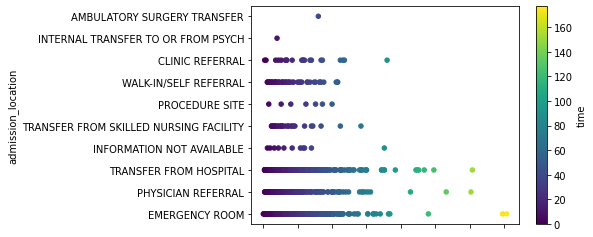

In [35]:
filtered_df.plot.scatter(y="admission_location", x="time", c="time", colormap="viridis")

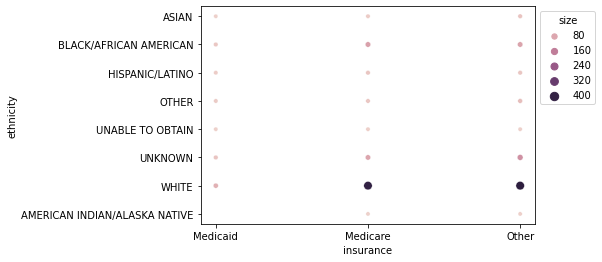

In [111]:
counts = filtered_df.groupby(by=['insurance', 'ethnicity']).size().to_frame('size').reset_index()
ax = sns.scatterplot(data=counts, x="insurance", y="ethnicity", hue="size", size="size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<AxesSubplot: xlabel='time', ylabel='admission_type'>

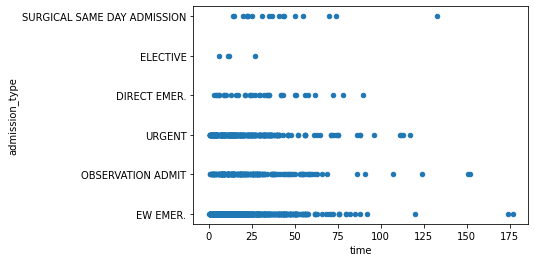

In [62]:
filtered_df.plot.scatter(x="time", y="admission_type")

In [113]:
joined = filtered_df.join(patients,lsuffix='_caller', rsuffix='_other')
joined = joined[joined["anchor_age"] > 0]
len(joined)

165

<AxesSubplot: xlabel='anchor_age', ylabel='insurance'>

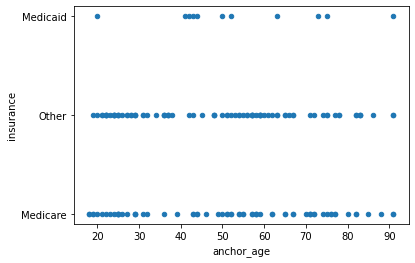

In [114]:
joined.plot.scatter(y="insurance", x="anchor_age")

<AxesSubplot: xlabel='anchor_age', ylabel='time'>

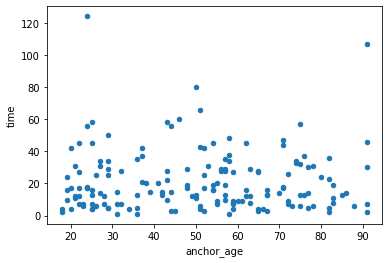

In [115]:
joined.plot.scatter(y="time", x="anchor_age")

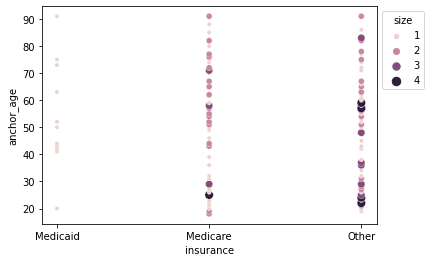

In [116]:
counts = joined.groupby(by=['insurance', 'anchor_age']).size().to_frame('size').reset_index()
ax = sns.scatterplot(data=counts, x="insurance", y="anchor_age", hue="size", size="size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))